<a href="https://colab.research.google.com/github/harshaveenar/foc/blob/main/Tumour_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tqdm import tqdm  # Add this import statement
import os
from cv2 import imread, createCLAHE
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model, save_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = os.path.join("/content/drive/MyDrive/Lungsegmentation/Image")
mask_path = os.path.join("/content/drive/MyDrive/Lungsegmentation/Mask")

In [ ]:
images = os.listdir(image_path)
mask = os.listdir(mask_path)

In [ ]:
print(images)
print(mask)

['I (1).png', 'I (2).png', 'I (3).png', 'I (4).png', 'I (6).png', 'I (7).png', 'I (8).png', 'I (9).png', 'I (10).png', 'I (11).png', 'I (12).png', 'I (13).png', 'I (14).png', 'I (15).png', 'I (16).png', 'I (17).png', 'I (18).png', 'I (19).png', 'I (20).png', 'I (21).png', 'I (22).png', 'I (23).png', 'I (24).png', 'I (25).png', 'I (29).png', 'I (30).png', 'I (31).png', 'I (32).png', 'I (33).png', 'I (34).png', 'I (35).png', 'I (36).png', 'I (37).png', 'I (38).png', 'I (39).png', 'I (40).png', 'I (41).png', 'I (42).png', 'I (43).png', 'I (44).png', 'I (45).png', 'I (46).png', 'I (47).png', 'I (48).png', 'I (49).png', 'I (50).png', 'I (51).png', 'I (52).png', 'I (53).png', 'I (55).png', 'I (56).png', 'I (57).png', 'I (59).png', 'I (5).png', 'I (26).png', 'I (27).png', 'I (54).png', 'I (28).png', 'I (58).png', 'I (60).png', 'I (61).png', 'I (62).png', 'I (63).png', 'I (64).png', 'I (65).png', 'I (66).png']
['M (1).png', 'M (2).png', 'M (3).png', 'M (4).png', 'M (6).png', 'M (5).png', 'M (7

In [ ]:
print(len(images))

66


In [ ]:
print(len(mask))

66


In [ ]:
# Here there are total 30 images, please mention number of images for testing and training
no_of_images_for_training=45
no_of_images_for_testing=21

In [ ]:

def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    t=0
    if flag == "test":
        for i in range(5):
            n=i+1
            t1="I"+" "+"("+str(n)+")"+".png"
            t2="M"+" "+"("+str(n)+")"+".png"
            im = cv2.resize(cv2.imread(os.path.join(image_path,t1)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,t2)),(X_shape,X_shape))[:,:,0]


            im_array.append(im)
            mask_array.append(mask)
            t+=1
            if t==5:
              break


        return im_array,mask_array

    if flag == "train":
        for i in range(30):
            n=i+1
            t1="I"+" "+"("+str(n)+")"+".png"
            t2="M"+" "+"("+str(n)+")"+".png"
            im = cv2.resize(cv2.imread(os.path.join(image_path,t1)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,t2)),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array


In [ ]:
# Loading Data
dim = 256*2
X_train,y_train = getData(dim,flag="train")

In [ ]:
X_test, y_test = getData(dim)

In [ ]:
print(len(X_train),len(y_train))

30 30


In [ ]:
print(len(X_test),len(y_test))

5 5


In [ ]:
def plotmask(X,y):
    sample = []

    for i in range(10):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)


    for i in range(0,9,3):
        plt.figure(figsize=(25,10))

        plt.subplot(3,3,1+i)
        plt.imshow(sample[i],cmap='Oranges')

        plt.subplot(3,3,2+i)
        plt.imshow(sample[i+1],cmap='Oranges')


        plt.subplot(3,3,3+i)
        plt.imshow(sample[i+2],cmap='Oranges')
        plt.show()

training set


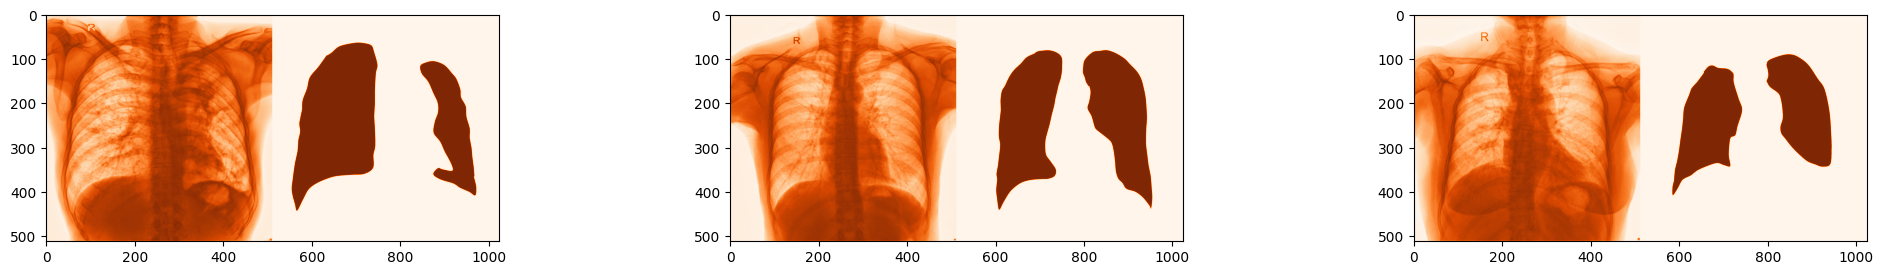

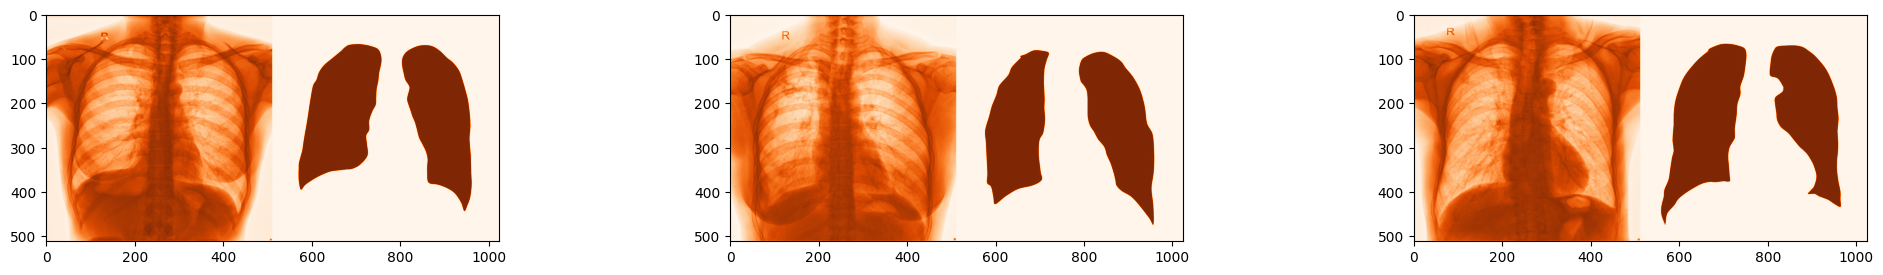

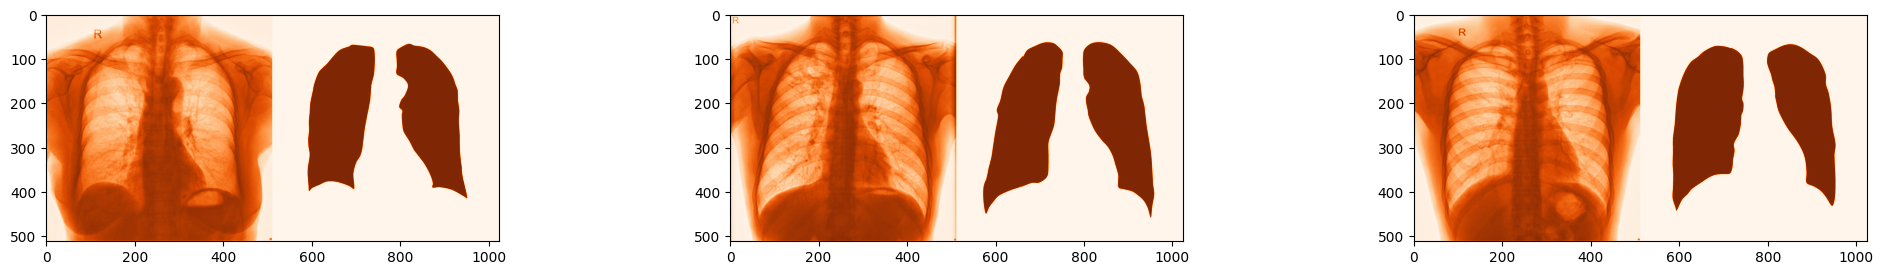

In [ ]:
print("training set")
plotmask(X_train,y_train)

In [ ]:
X_train = np.array(X_train).reshape(len(X_train),dim,dim,1)
y_train = np.array(y_train).reshape(len(y_train),dim,dim,1)
X_test = np.array(X_test).reshape(len(X_test),dim,dim,1)
y_test = np.array(y_test).reshape(len(y_test),dim,dim,1)
assert X_train.shape == y_train.shape
assert X_test.shape == y_test.shape
images = np.concatenate((X_train,X_test),axis=0)
mask  = np.concatenate((y_train,y_test),axis=0)

In [ ]:
import os

# Print the contents of the directory
directory_path = '/content/drive/MyDrive/Lungsegmentation/'
print(os.listdir(directory_path))


['Segnet .ipynb', 'Image', 'Mask', 'predicted', 'Copy of Tumour (2).ipynb', 'predictedoverlay_image_1.png', 'predictedoverlay_image_2.png', 'predictedoverlay_image_3.png', 'my_model.h5', 'model', 'last.ipynb', 'Tumour kkk.ipynb', 'Tumour (2).ipynb']


In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def unet(input_size=(256,256,1)):
    inputs = Input(input_size)

    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    return Model(inputs=[inputs], outputs=[conv10])

In [ ]:
from tensorflow.keras.optimizers import Adam
model = unet(input_size=(512,512,1))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 32)         320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 32)         9248      ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 256, 256, 32)         0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                   patience=3,
                                   verbose=1, mode='min', min_delta=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss",
                      mode="min",
                      patience=15) # probably needs to be more patient
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.compile(optimizer=Adam(lr=2e-4),
              loss=[dice_coef_loss],
           metrics = [dice_coef, 'binary_accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((images-127.0)/127.0,
                                                            (mask>127).astype(np.float32),
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg,
                                                            test_size = 0.1,
                                                            random_state = 2018)

loss_history = model.fit(x = train_vol,
                       y = train_seg,
                         batch_size = 16,
                  epochs = 50,
                  validation_data =(test_vol,test_seg) ,
                  callbacks=callbacks_list)


Epoch 1/50
1/2 [==============>...............] - ETA: 0s - loss: 0.1212 - dice_coef: -0.1212 - binary_accuracy: 0.4372
Epoch 1: val_loss did not improve from 0.19695
2/2 [==============================] - 1s 550ms/step - loss: 0.1039 - dice_coef: -0.0999 - binary_accuracy: 0.4324 - val_loss: 0.1969 - val_dice_coef: -0.1969 - val_binary_accuracy: 0.4833 - lr: 0.0010
Epoch 2/50
1/2 [==============>...............] - ETA: 0s - loss: 0.1032 - dice_coef: -0.1032 - binary_accuracy: 0.4189
Epoch 2: val_loss did not improve from 0.19695
2/2 [==============================] - 0s 178ms/step - loss: 0.1028 - dice_coef: -0.1027 - binary_accuracy: 0.4324 - val_loss: 0.1969 - val_dice_coef: -0.1969 - val_binary_accuracy: 0.4833 - lr: 0.0010
Epoch 3/50
1/2 [==============>...............] - ETA: 0s - loss: 0.1027 - dice_coef: -0.1027 - binary_accuracy: 0.4115
Epoch 3: val_loss did not improve from 0.19695
2/2 [==============================] - 0s 217ms/step - loss: 0.1028 - dice_coef: -0.1028 - bina

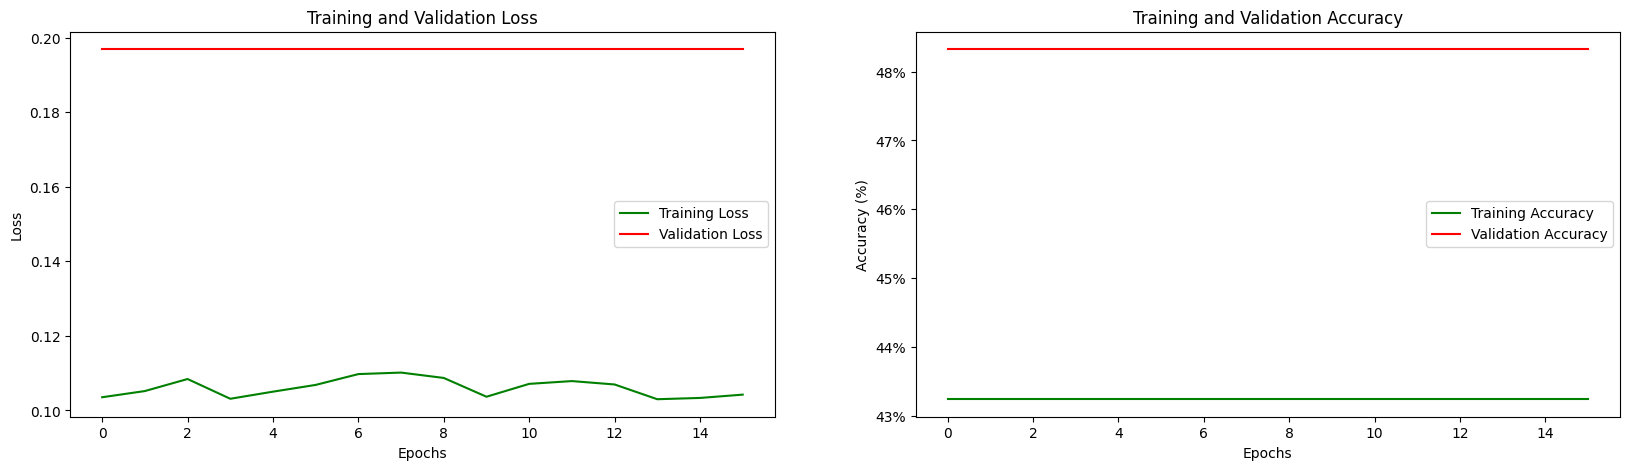

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(loss_history.history['loss'], '-', label='Training Loss', color='green')
ax1.plot(loss_history.history['val_loss'], '-', label='Validation Loss', color='red')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(100 * np.array(loss_history.history['binary_accuracy']), '-',
         label='Training Accuracy', color='green')
ax2.plot(100 * np.array(loss_history.history['val_binary_accuracy']), '-',
         label='Validation Accuracy', color='red')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy (%)')
ax2.legend()
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.savefig("validation.png")
plt.show()


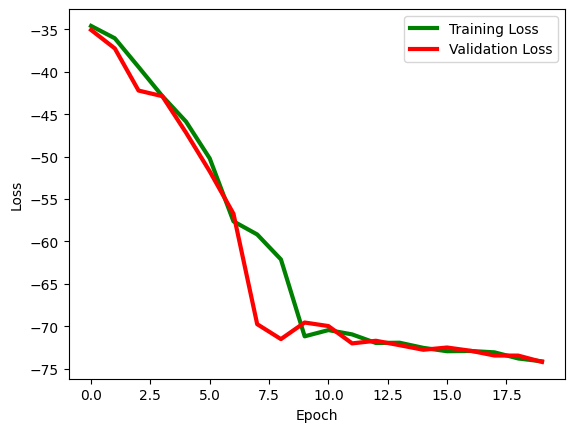

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(100*np.array(loss_history.history['loss']), 'green',
         label = 'Training Loss', linewidth=3)
plt.plot(100*np.array(loss_history.history['val_loss']), 'red',
         label = 'Validation Loss', linewidth=3)
plt.xlabel("Epoch")
plt.ylabel("Loss")
#plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("ACC.tiff",dpi=700)

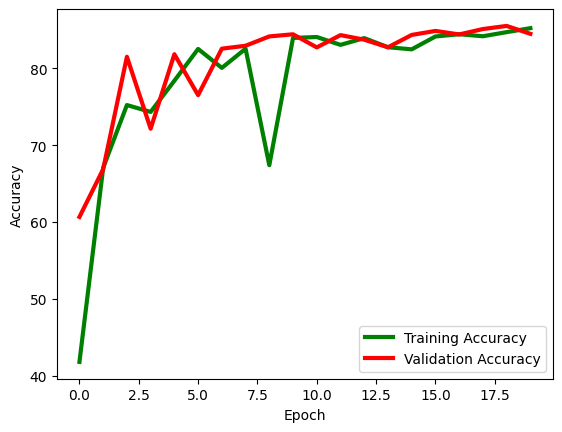

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(100*np.array(loss_history.history['binary_accuracy']), 'green',
         label = 'Training Accuracy', linewidth=3)
plt.plot(100*np.array(loss_history.history['val_binary_accuracy']), 'red',
         label = 'Validation Accuracy', linewidth=3)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc=0)
plt.figure()
plt.show()
plt.savefig("ACC.tiff",dpi=700)

1/1 [==============================] - 0s 284ms/step


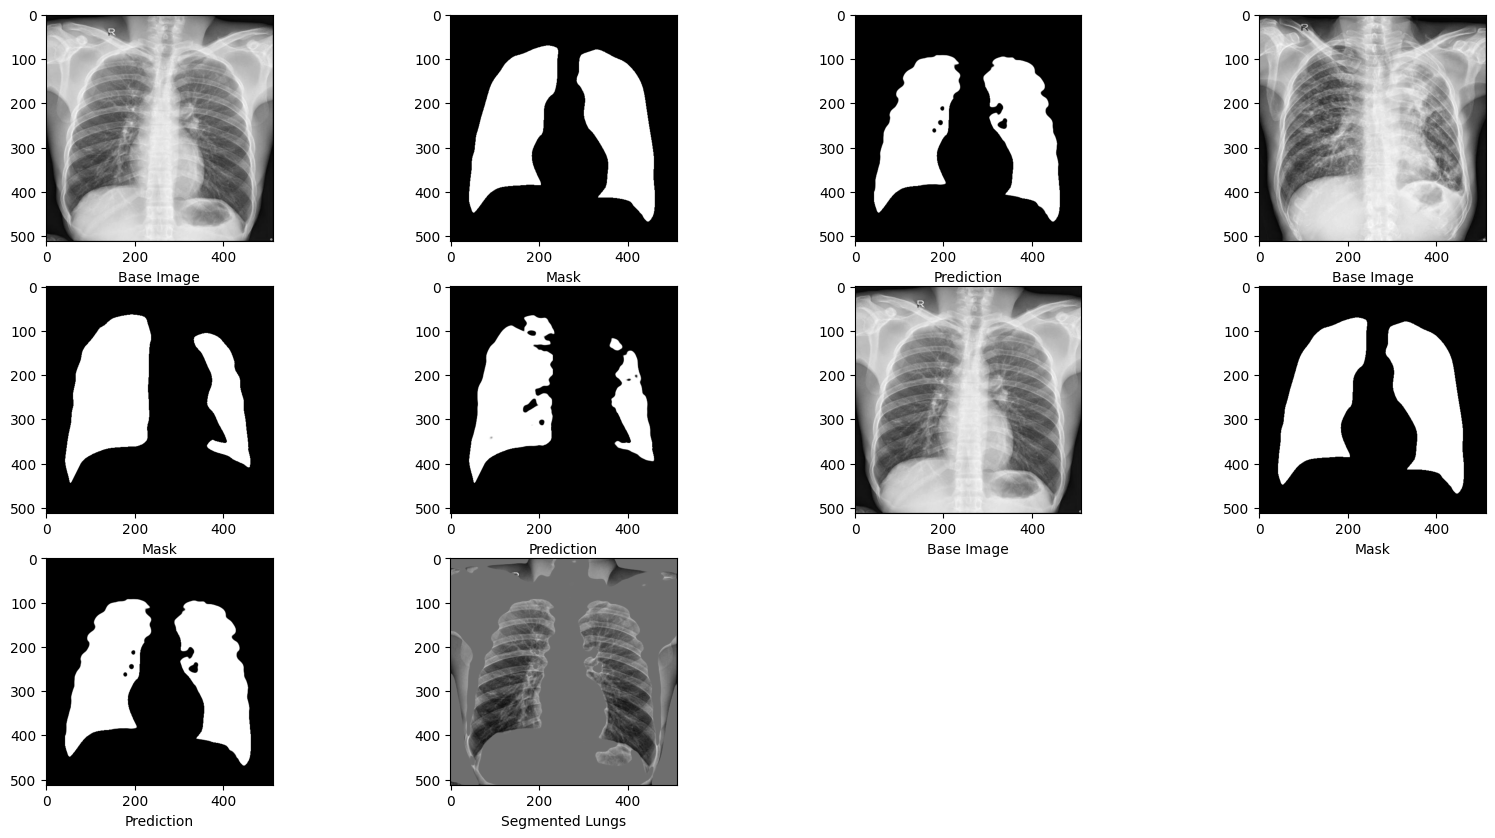

In [ ]:
# Assuming `model` is your trained UNET model

pred_candidates = np.random.randint(1, validation_vol.shape[0], 10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20, 10))

for i in range(0, 9, 3):
    plt.subplot(3, 4, i + 1)

    # Displaying the original image
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]), cmap="gray")
    plt.xlabel("Base Image")

    plt.subplot(3, 4, i + 2)

    # Displaying the original mask
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]), cmap="gray")
    plt.xlabel("Mask")

    plt.subplot(3, 4, i + 3)

    # Displaying the segmented mask
    mask_pred = np.squeeze(preds[pred_candidates[i]]) * (
                np.squeeze(validation_seg[pred_candidates[i]]) > 0)
    plt.imshow(mask_pred, cmap="gray")
    plt.xlabel("Prediction")

    plt.subplot(3, 4, i + 4)

    # Displaying the segmented lungs
    segmented_lungs = np.squeeze(preds[pred_candidates[i]]) * np.squeeze(validation_vol[pred_candidates[i]])
    plt.imshow(segmented_lungs, cmap="gray")
    plt.xlabel("Segmented Lungs")

plt.savefig("lung_segmentation_output.png")


In [ ]:
# Assuming model is your trained UNET model

pred_candidates = np.random.randint(1, validation_vol.shape[0], 10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20, 10))

for i in range(0, 9, 3):
    plt.subplot(3, 3, i + 1)

    # Displaying the original image
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]), cmap="gray")
    plt.xlabel("Base Image")

    plt.subplot(3, 3, i + 2)

    # Displaying the original mask
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]), cmap="gray")
    plt.xlabel("Mask")

    plt.subplot(3, 3, i + 3)

    # Get only the segmented part of the lungs without the background
    segmented_lungs = np.squeeze(preds[pred_candidates[i]]) * np.squeeze(validation_vol[pred_candidates[i]])
    plt.imshow(segmented_lungs, cmap="gray")
    plt.xlabel("Segmented Lungs")

plt.savefig("segmented_lungs_output.png")


NameError: name 'validation_vol' is not defined

NameError: name 'validation_vol' is not defined

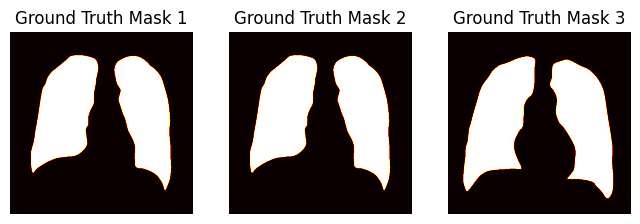

In [ ]:
plt.figure(figsize=(8, 5))

for i in range(3):  # Display three ground truth masks
    plt.subplot(1, 3, i + 1)
    pred_index = pred_candidates[i]

    plt.imshow(np.squeeze(validation_seg[pred_index]), cmap="hot")
    plt.title(f"Ground Truth Mask {i + 1}")
    plt.axis("off")

plt.savefig("ground_truth_masks_output.png")


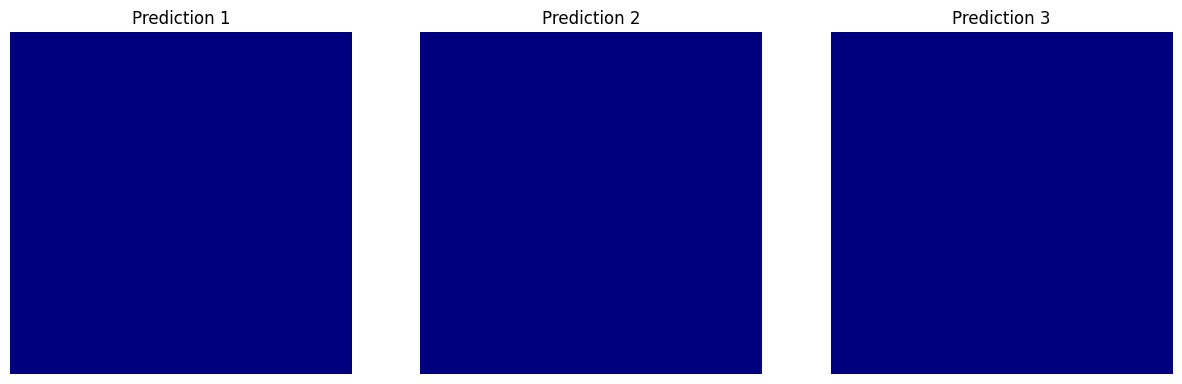

In [ ]:
plt.figure(figsize=(15, 5))

for i in range(3):  # Display three predicted images
    plt.subplot(1, 3, i + 1)
    pred_index = pred_candidates[i]

    plt.imshow(np.squeeze(preds[pred_index]), cmap="jet")
    plt.title(f"Prediction {i + 1}")
    plt.axis("off")

plt.savefig("predicted_images_output.png")

In [ ]:
##### Checking and extracting the indexes of "Convolutional Layers"
t=list(model.layers)
conv_index=[]
for i in range(len(t)):
  layer=t[i]
  if 'conv' in layer.name:
    conv_index.append(i)

print("Indexes of Convolutional Layers are ",conv_index)

Indexes of Convolutional Layers are  [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31]


In [ ]:
##### Checking layer name and output shapes
for i in conv_index:
  layer=model.layers[i]
  print("layer name is :{}            output Shape is : {}".format(layer.name,layer.output.shape))

layer name is :conv2d_19            output Shape is : (None, 512, 512, 32)
layer name is :conv2d_20            output Shape is : (None, 512, 512, 32)
layer name is :conv2d_21            output Shape is : (None, 256, 256, 64)
layer name is :conv2d_22            output Shape is : (None, 256, 256, 64)
layer name is :conv2d_23            output Shape is : (None, 128, 128, 128)
layer name is :conv2d_24            output Shape is : (None, 128, 128, 128)
layer name is :conv2d_25            output Shape is : (None, 64, 64, 256)
layer name is :conv2d_26            output Shape is : (None, 64, 64, 256)
layer name is :conv2d_27            output Shape is : (None, 32, 32, 512)
layer name is :conv2d_28            output Shape is : (None, 32, 32, 512)
layer name is :conv2d_transpose_4            output Shape is : (None, 64, 64, 256)
layer name is :conv2d_29            output Shape is : (None, 64, 64, 256)
layer name is :conv2d_30            output Shape is : (None, 64, 64, 256)
layer name is :conv2d

In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[30].output)
M_conv_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 512, 512, 32)         320       ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 512, 512, 32)         9248      ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 256, 256, 32)         0         ['conv2d_20[0][0]']           
 g2D)                                                                                       

In [ ]:
import numpy as np

# Assuming validation_vol[0] is a single sample
single_sample = validation_vol[0]

# Add an extra dimension to simulate a batch
single_sample = np.expand_dims(single_sample, axis=0)

# Now you can use predict
feature_maps = M_conv_1.predict(single_sample)

# 'feature_maps' will contain the output of the last convolutional layer for the given input
# You can explore or visualize these feature maps as needed


1/1 [==============================] - 0s 177ms/step


In [ ]:
t=feature_maps

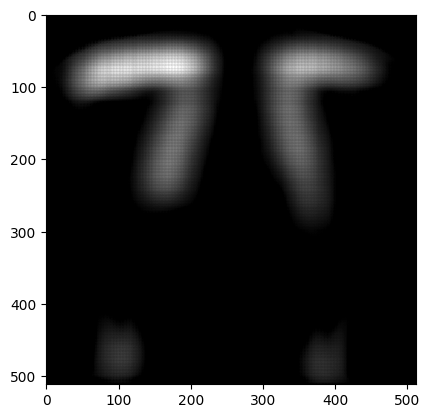

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Assuming t[0] is the image data
image_data = t[0]

# Select a specific channel to visualize (e.g., the first channel)
channel_to_visualize = 0

# Ensure data type is appropriate (e.g., float or uint8)
image_data = image_data.astype(np.uint8)

# Squeeze the array if it has a batch dimension
image_data = np.squeeze(image_data)

# Extract the selected channel
selected_channel = image_data[:, :, channel_to_visualize]

# Plot the image with 'none' interpolation
plt.imshow(selected_channel, cmap='gray', interpolation='none')
plt.show()



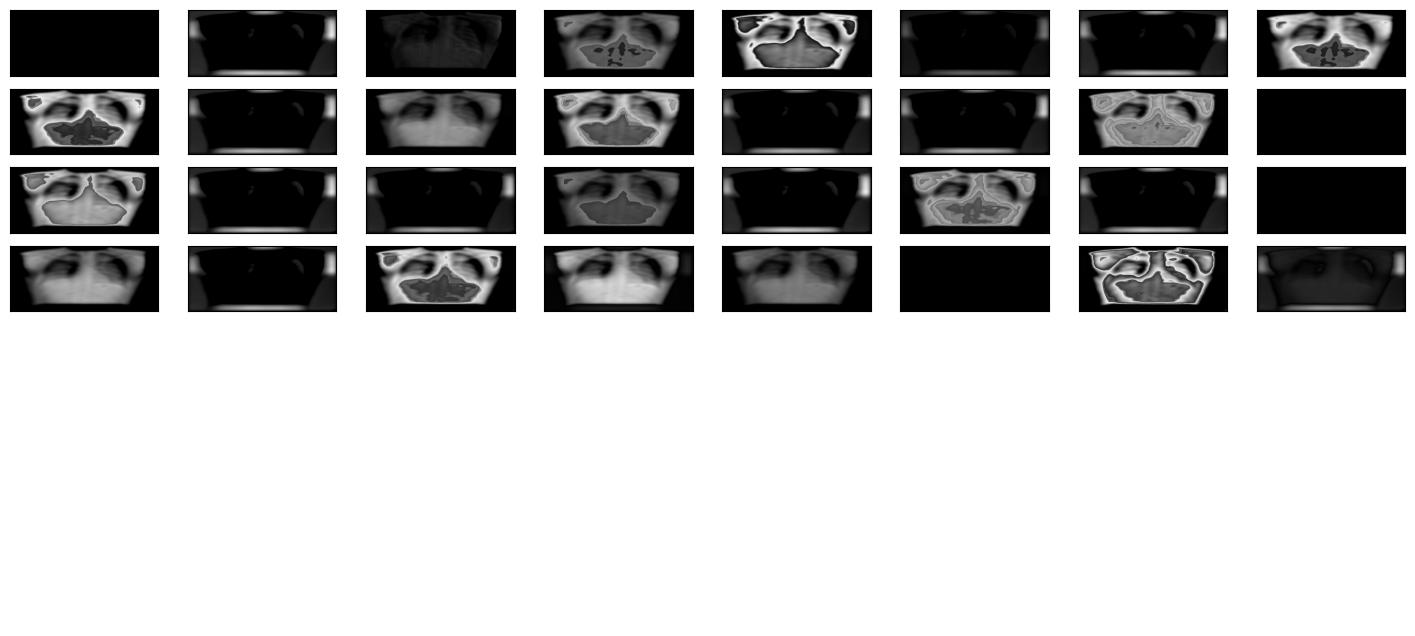

In [ ]:
from matplotlib import pyplot

# Assuming t[0] is the image data
image_data = t[0]

# Ensure data type is appropriate (e.g., float or uint8)
image_data = image_data.astype(np.uint8)

# Squeeze the array if it has a batch dimension
image_data = np.squeeze(image_data)

# Get the number of channels
num_channels = image_data.shape[2]

square = 8
fig, axes = pyplot.subplots(square, square, figsize=(18, 8))

for i in range(square):
    for j in range(square):
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_aspect('equal')

        # Ensure that the channel index is within bounds
        channel_to_visualize = i * square + j
        if channel_to_visualize < num_channels:
            selected_channel = image_data[:, :, channel_to_visualize]
            axes[i, j].imshow(selected_channel, cmap='gray', aspect='auto')
        else:
            axes[i, j].axis('off')  # Turn off empty subplots if there are fewer channels

pyplot.savefig("hsv_r.png", dpi=300)
pyplot.show()
